In [1]:
pip install matplotlib seaborn plotly pandas

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [15]:

# Path folder tempat file CSV kamu
base_path = 'D:/data/dataanalyticengineer/dataclean/'

# Load data
books = pd.read_csv(base_path + 'clean_books.csv')
progress = pd.read_csv(base_path + 'reading_progress.csv')
user_summary = pd.read_csv(base_path + 'user_summary.csv')
interactions = pd.read_csv(base_path + 'user_interactions.csv')
segments = pd.read_csv(base_path + 'segment_summary.csv')



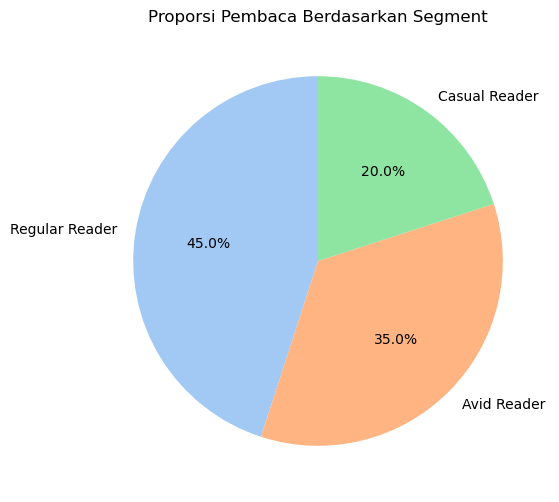

In [16]:
proporsi = user_summary['reader_segment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(proporsi, # Penggunaan 1
        labels=proporsi.index, # Penggunaan 2 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('pastel')
)
# Hapus pesan output yang tidak perlu
plt.title('Proporsi Pembaca Berdasarkan Segment')
plt.show() # <--- Pastikan ini adalah baris terakhir di cell Anda

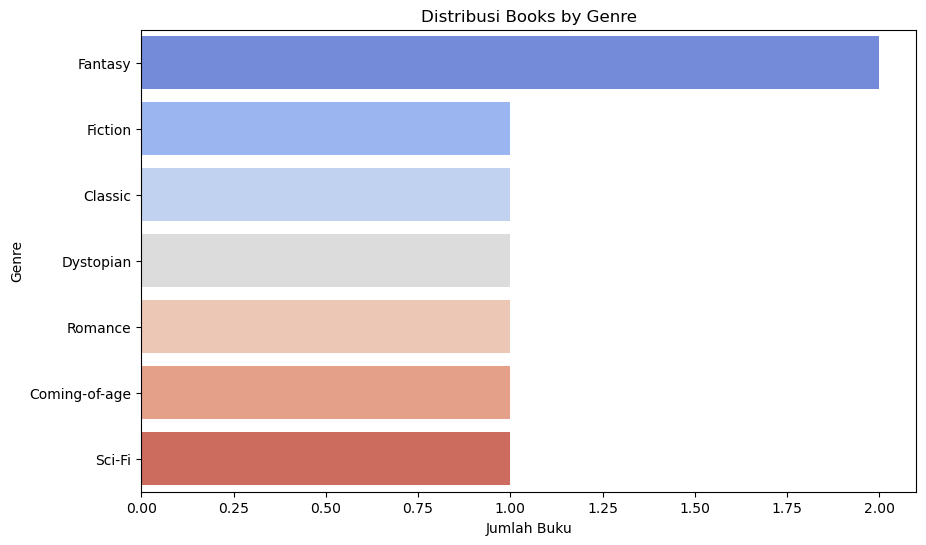

In [18]:
#Hitung jumlah buku per genre (menghasilkan Series)
genre_counts_series = books['genre'].value_counts()

#Ubah Series menjadi DataFrame
genre_df = genre_counts_series.reset_index()
genre_df.columns = ['Genre', 'Jumlah Buku'] 

#Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(
    data=genre_df,    
    x='Jumlah Buku',     
    y='Genre',           
    hue='Genre',
    palette='coolwarm',
    legend=False
)
plt.title('Distribusi Books by Genre')
plt.xlabel('Jumlah Buku')
plt.ylabel('Genre')
plt.show()

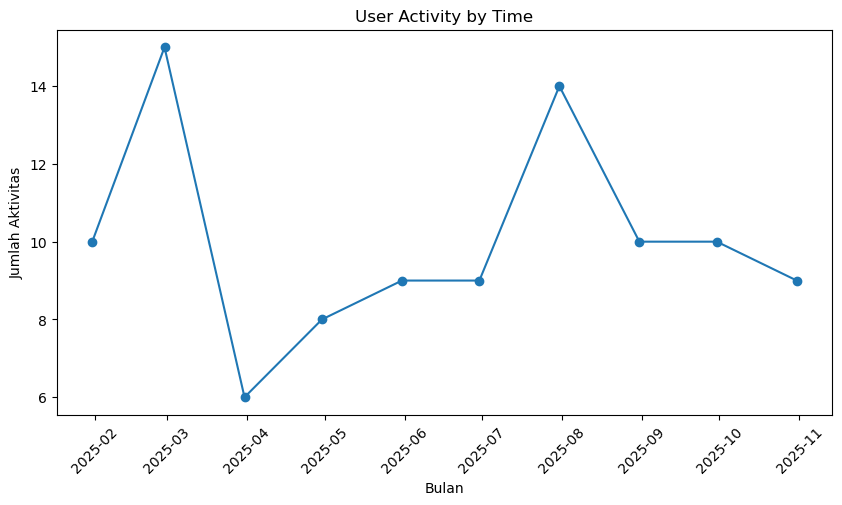

In [47]:
# User Activity
interactions['timestamp'] = pd.to_datetime(interactions['timestamp']) 
daily_activity = interactions.groupby(interactions['timestamp'].dt.date).size().reset_index(name='activity_count')
daily_activity.columns = ['timestamp', 'activity_count']
daily_activity['timestamp'] = pd.to_datetime(daily_activity['timestamp'])
#Ubah data dari harian ke bulanan
monthly_activity = daily_activity.set_index('timestamp').resample('ME')['activity_count'].sum().reset_index()  

plt.figure(figsize=(10,5))
plt.plot(monthly_activity['timestamp'], monthly_activity['activity_count'], marker='o')
plt.title('User Activity by Time')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Aktivitas')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Jumlah Pembaca')

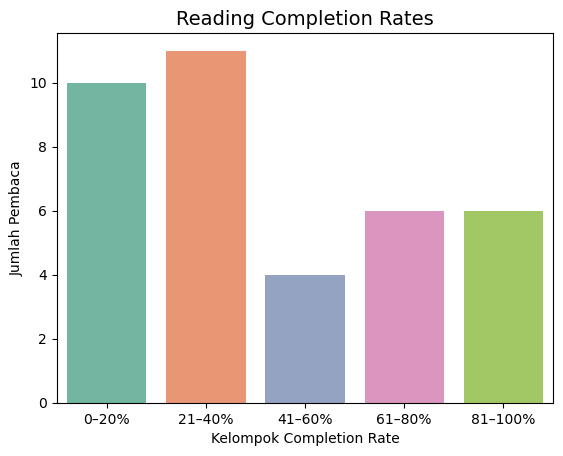

In [49]:
group_data = pd.DataFrame({
    'Kelompok': ['0–20%', '21–40%', '41–60%', '61–80%', '81–100%'],
    'Jumlah Pembaca': [10, 11, 4, 6, 6]
})
sns.barplot(
    data=group_data,
    x='Kelompok',
    y='Jumlah Pembaca',
    hue='Kelompok',
    palette='Set2',
    legend=False
)
plt.title('Reading Completion Rates', fontsize=14)
plt.xlabel('Kelompok Completion Rate')
plt.ylabel('Jumlah Pembaca')

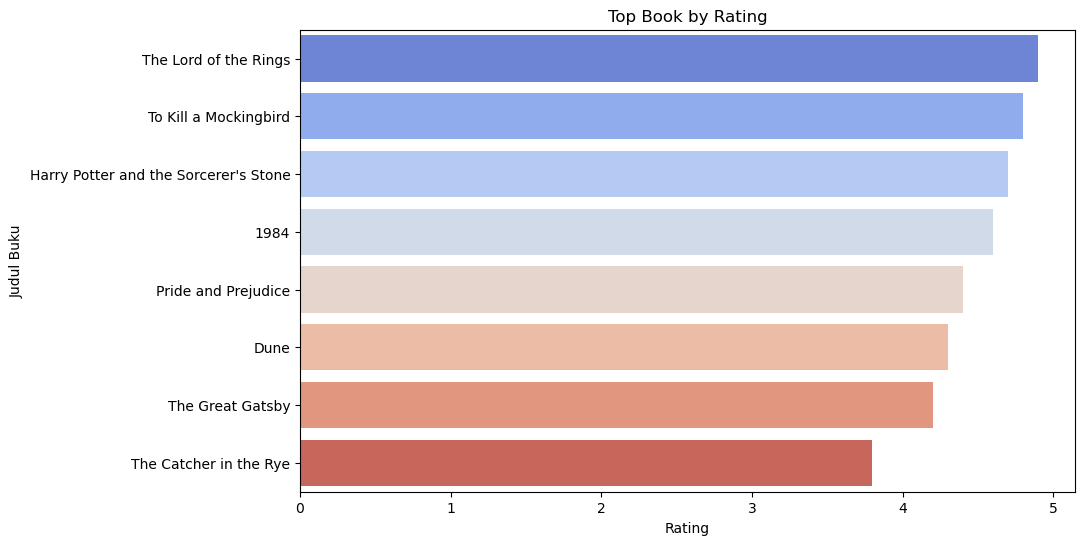

In [28]:

# 1. Perbaikan: Mengurutkan dan mengambil 10 teratas
top_books = books.sort_values(by='rating', ascending=False).head(10)

# 2. Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_books, # Tentukan data
    x='rating',     # Sumbu X adalah rating
    y='title',      # Sumbu Y adalah judul buku
    hue='title',
    palette='coolwarm',
    legend=False
)
plt.title('Top Book by Rating')
plt.xlabel('Rating')
plt.ylabel('Judul Buku')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15000\1890460015.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_15000\1890460015.py:59: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\user\AppData\Local\Temp\ipykernel_15000\1890460015.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


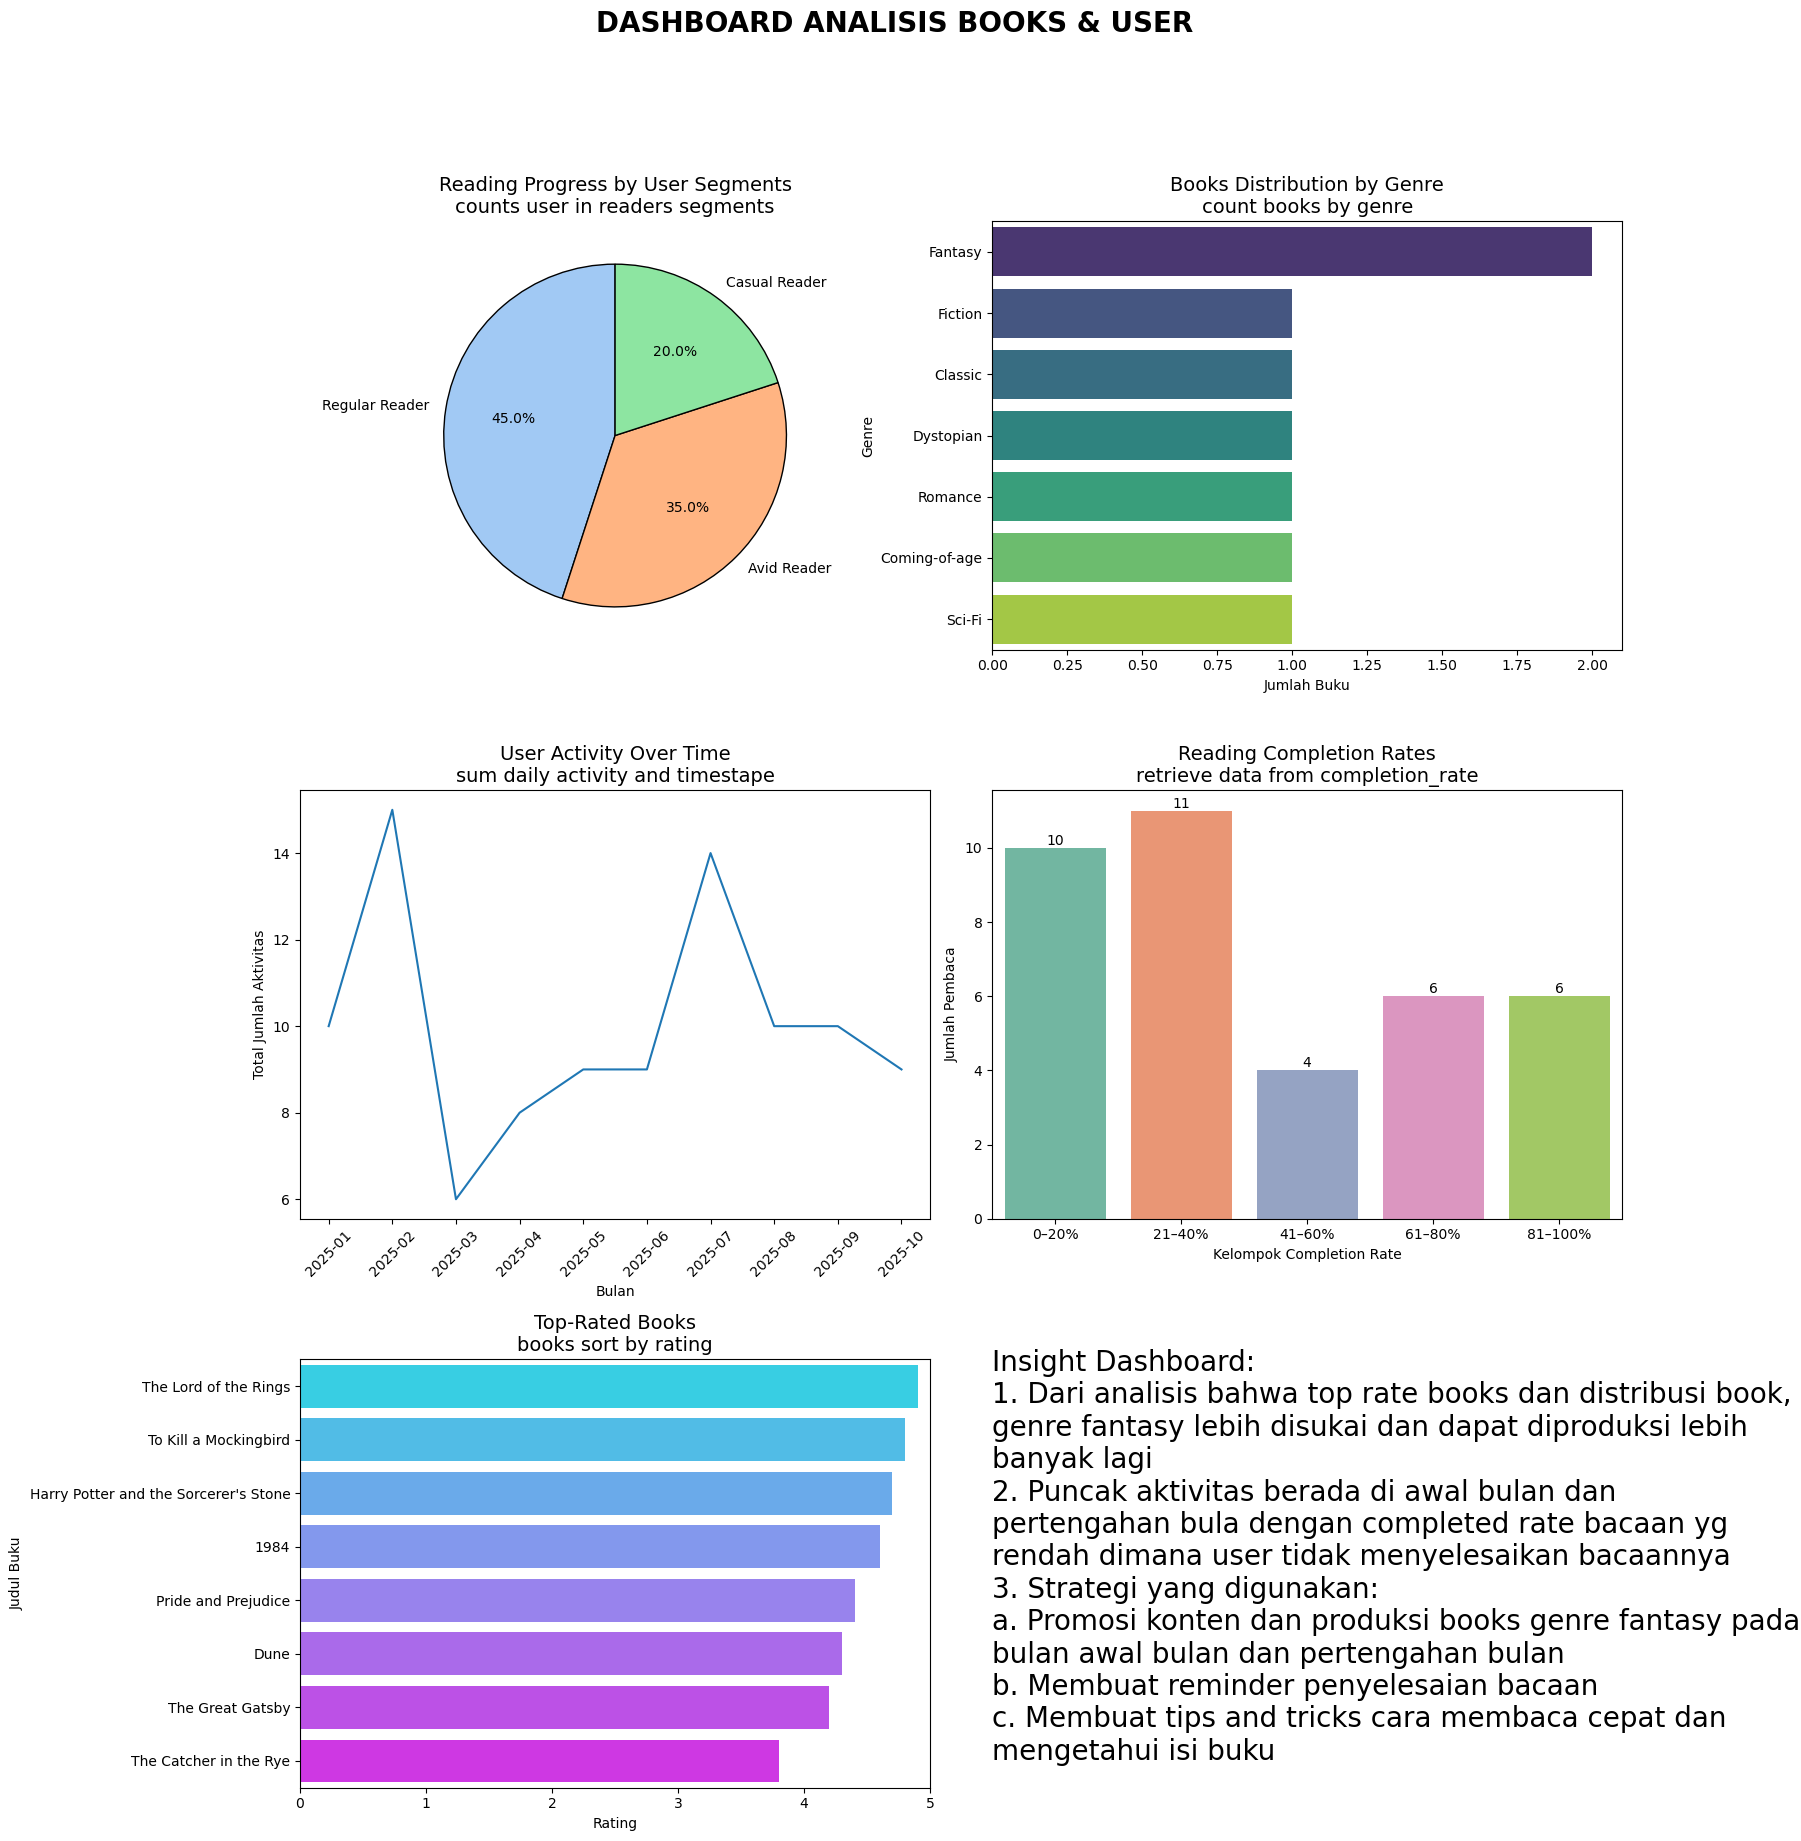

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#1. SETUP DATA 
#Definisikan data plotting
#Data top books
top_books = books.sort_values(by='rating', ascending=False).head(10)

#Data Aktivitas Bulanan

monthly_activity = daily_activity.set_index('timestamp').resample('ME')['activity_count'].sum().reset_index()

#Data Proporsi Segmen
proporsi_series = user_summary['reader_segment'].value_counts()
proporsi_df = proporsi_series.reset_index()
proporsi_df.columns = ['Segmen', 'Jumlah Pembaca']

# Data Distribusi Genre
genre_counts_series = books['genre'].value_counts()
genre_df = genre_counts_series.reset_index()
genre_df.columns = ['Genre', 'Jumlah Buku'] 


#2. INTI DASHBOARD:

#Buat Figure (Kanvas) dan Axes (Slot Grafik)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.3)


#1: Proporsi Pembaca Berdasarkan Segmen (Pie Chart)
axes[0, 0].pie(
    proporsi_series, 
    labels=proporsi_series.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)
axes[0, 0].set_title('Reading Progress by User Segments\ncounts user in readers segments', fontsize=14)


#2: Distribusi Genre (Bar Chart Horizontal)
sns.barplot(
    ax=axes[0, 1],
    data=genre_df.sort_values(by='Jumlah Buku', ascending=False),
    x='Jumlah Buku',
    y='Genre',
    palette='viridis',
    legend=False
)
axes[0, 1].set_title('Books Distribution by Genre\ncount books by genre', fontsize=14)
axes[0, 1].set_xlabel('Jumlah Buku')
axes[0, 1].set_ylabel('Genre')


#3: Aktivitas Bulanan (Line Chart)
sns.lineplot(
    ax=axes[1, 0],
    x=monthly_activity['timestamp'].dt.strftime('%Y-%m'), 
    y=monthly_activity['activity_count'],
    palette='Blues_d'
)
axes[1, 0].set_title('User Activity Over Time\nsum daily activity and timestape', fontsize=14)
axes[1, 0].set_xlabel('Bulan')
axes[1, 0].set_ylabel('Total Jumlah Aktivitas')
axes[1, 0].tick_params(axis='x', rotation=45)



#4: Distribusi Kelompok Completion Rate (Bar Chart Vertikal)
group_data = pd.DataFrame({
    'Kelompok': ['0–20%', '21–40%', '41–60%', '61–80%', '81–100%'],
    'Jumlah Pembaca': [10, 11, 4, 6, 6]
})
sns.barplot(
    ax=axes[1, 1],
    data=group_data,
    x='Kelompok',
    y='Jumlah Pembaca',
    palette='Set2'
)
axes[1, 1].set_title('Reading Completion Rates\nretrieve data from completion_rate', fontsize=14)
axes[1, 1].set_xlabel('Kelompok Completion Rate')
axes[1, 1].set_ylabel('Jumlah Pembaca')
# Tambahkan label di atas batang
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')


#5: Top Book by Rating
sns.barplot(
    ax=axes[2, 0],
    data=top_books,
    x='rating',
    y='title',
    hue='title',
    palette='cool',
    dodge=False,
    legend=False
)
axes[2, 0].set_title('Top-Rated Books\nbooks sort by rating', fontsize=14)
axes[2, 0].set_xlabel('Rating')
axes[2, 0].set_ylabel('Judul Buku')
axes[2, 0].set_xlim(0, 5)

#Kosongkan slot kanan bawah
axes[2, 1].axis('off')
summary_text = (
    "Insight Dashboard:\n"
    "1. Dari analisis bahwa top rate books dan distribusi book, genre fantasy lebih disukai dan dapat diproduksi lebih banyak lagi\n"
    "2. Puncak aktivitas berada di awal bulan dan pertengahan bula dengan completed rate bacaan yg rendah dimana user tidak menyelesaikan bacaannya\n"
    "3. Strategi yang digunakan:\n"
    "a. Promosi konten dan produksi books genre fantasy pada bulan awal bulan dan pertengahan bulan\n"
    "b. Membuat reminder penyelesaian bacaan\n"
    "c. Membuat tips and tricks cara membaca cepat dan mengetahui isi buku\n"
)

#Tambahkan teks di tengah axes[2,1]
axes[2, 1].text(
    0.0, 0.5,
    summary_text,
    ha='left',
    va='center',
    fontsize=20,
    wrap=True
)

#Judul dashboard
plt.suptitle('DASHBOARD ANALISIS BOOKS & USER', fontsize=20, weight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#Simpan dashboard ke file PNG
fig.savefig("dashboardbook.png", dpi=300, bbox_inches='tight')




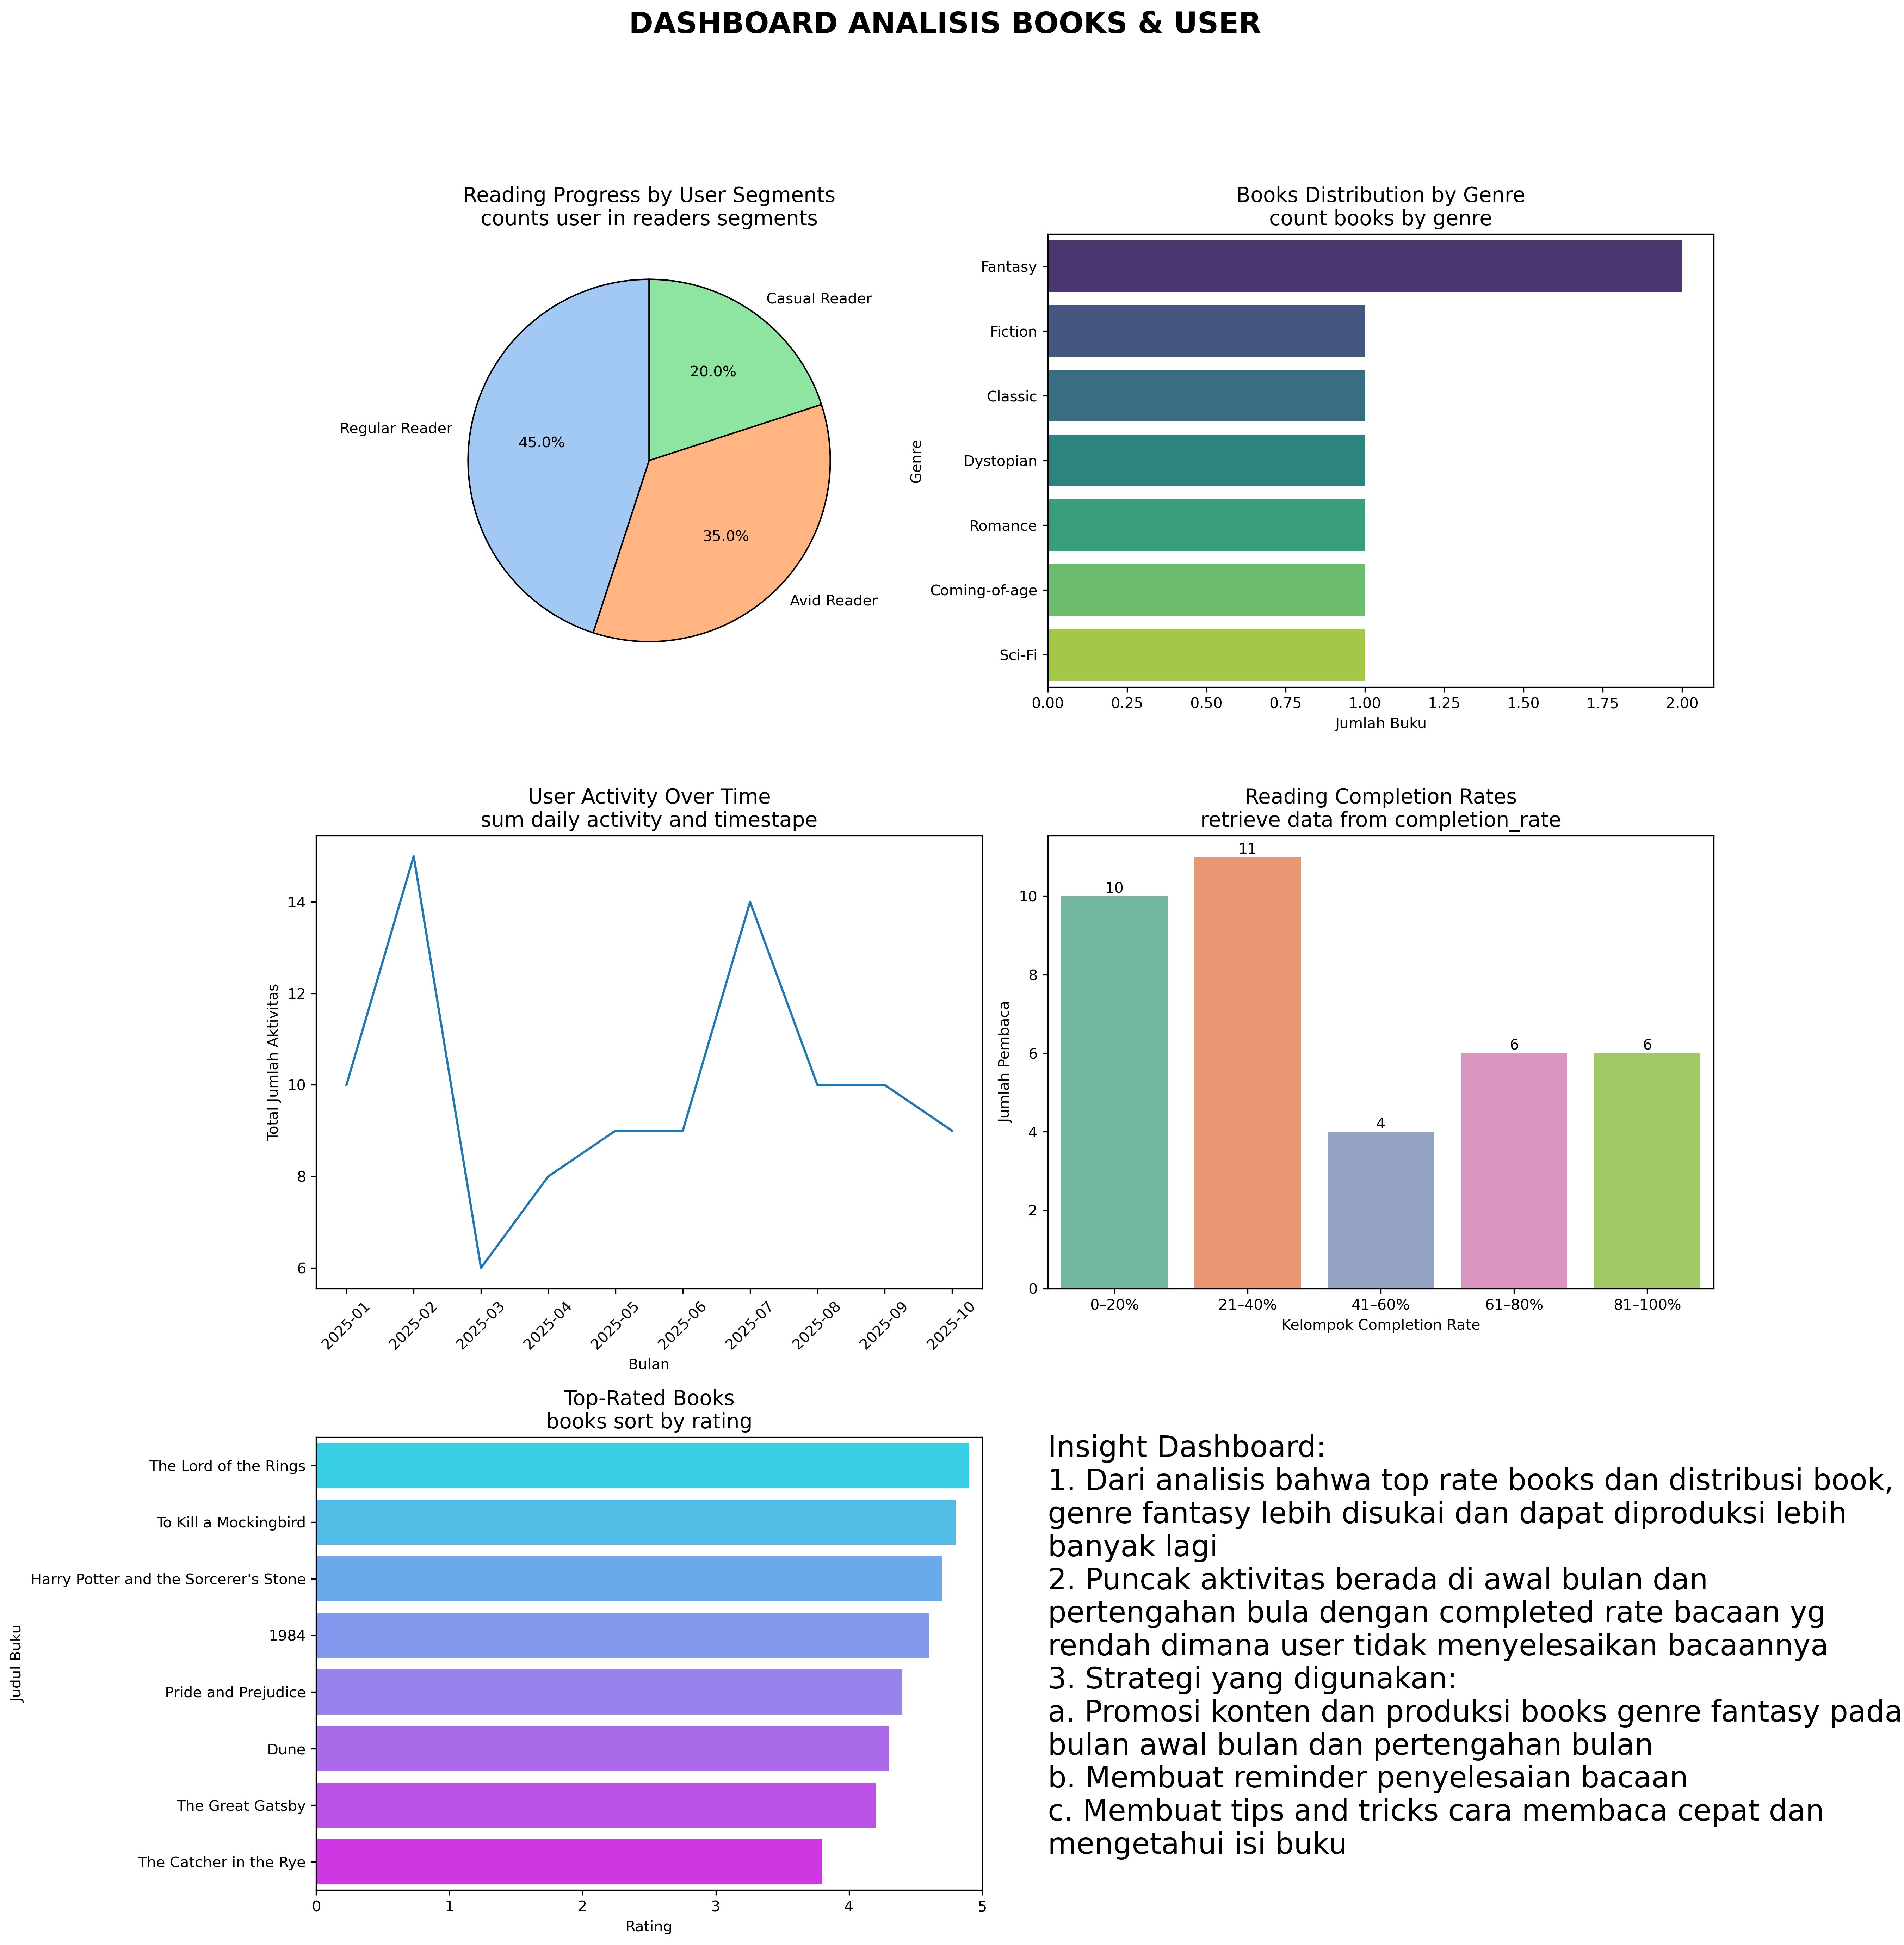

In [52]:
from IPython.display import Image
Image("dashboardbook.png")


In [54]:
fig.savefig("D:\data\dataanalyticengineer\dataclean\dashboardbook.png", dpi=300, bbox_inches='tight')
